Felipe Castillo¶
http://thinkstats2.com

Assignement week Four

DSC530-T301 Data Exploration and Analysis

#Exercise 3.1


In [59]:
from __future__ import print_function, division

import sys
import os


os.chdir ('C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')

import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import nsfg
import thinkplot
import numpy as np





#setting working directory to my directory


In [8]:
resp = nsfg.ReadFemResp()


resp_df = resp['numkdhh']



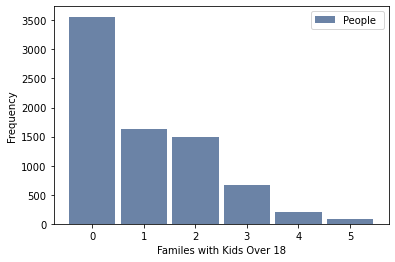

In [11]:
hist = thinkstats2.Hist(resp_df, label='People ')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Familes with Kids Over 18', ylabel='Frequency')

In [13]:
pmf_resp = thinkstats2.Pmf(resp_df, label='label')

In [15]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

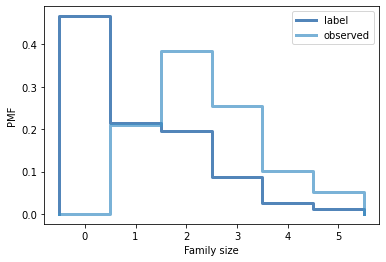

In [19]:
biased_pmf = BiasPmf(pmf_resp, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_resp, biased_pmf])
thinkplot.Config(xlabel='Family size', ylabel='PMF')

In [ ]:
#Exercise 3.2

In [21]:
print("Actual mean", pmf_resp.Mean())
print("Observed mean", biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


In [25]:
#Function is provided by thinkstats2 code
# Allen Downey forgot to include this code per his comments 
#https://github.com/AllenDowney/ThinkStats2/issues/112

PmfMean = thinkstats2.Mean(pmf_resp)
PmfVar = thinkstats2.Var(pmf_resp)


print("Summarzing distribution mean", PmfMean)
print("Summarzing distribution variance", PmfVar)



Summarzing distribution mean 2.5
Summarzing distribution variance 2.9166666666666665


In [27]:
#Exercise 4.1



In [30]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [31]:
total_baby_weight_df = preg['totalwgt_lb']

In [35]:
myWeight = 8.6

In [33]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [38]:
PercentileRank(total_baby_weight_df, myWeight)

56.80865151180755

#Exercise 4.2


In [43]:
outRandomArray = np.random.random(size = 1000)
print(outRandomArray)

[0.16153196 0.72895067 0.93699185 0.53114462 0.55516224 0.92549773
 0.15809285 0.18450443 0.72551909 0.03468544 0.42183611 0.585859
 0.95434629 0.59306517 0.59843053 0.95663672 0.95205237 0.79812656
 0.83326609 0.44176025 0.92959745 0.40772089 0.88340308 0.49353508
 0.76503496 0.68909505 0.94432813 0.05056109 0.34101042 0.192268
 0.66654778 0.12953598 0.64956714 0.33595341 0.06066803 0.13092611
 0.67187505 0.19202974 0.68018499 0.12609287 0.41493639 0.3364809
 0.14038436 0.52527796 0.11902356 0.57870345 0.21600815 0.57735814
 0.67898847 0.78466954 0.999849   0.17211884 0.08988648 0.22459077
 0.27028779 0.72766201 0.80604037 0.58681759 0.15305525 0.08158929
 0.26181609 0.89528106 0.37925527 0.87417292 0.72001688 0.99128281
 0.04357134 0.86339156 0.76124118 0.74870532 0.64311075 0.10464908
 0.49481699 0.1987457  0.65010598 0.11828292 0.14823945 0.61978986
 0.53718689 0.07111346 0.50357146 0.79856856 0.5993908  0.25123309
 0.13871576 0.47767211 0.87608896 0.19958482 0.2420044  0.89039387


{'xscale': 'linear', 'yscale': 'linear'}

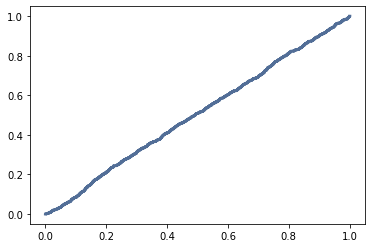

In [52]:
cdf = thinkstats2.Cdf(outRandomArray, label="CDF")

thinkplot.Cdf(cdf)


In [54]:
pmf = thinkstats2.Pmf(outRandomArray)

<AxesSubplot:ylabel='PMF'>

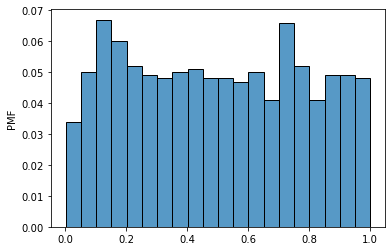

In [61]:
plt.ylabel('PMF')
sns.histplot(outRandomArray, stat='probability', bins=20)

The cdf graph give more of a uniform look. However the PMF doesnt look to be 100 percent uniform. ALthought it very close to being a uniform graph. The Cdf almost resembles a liner graph.